# NBA Lineup Selector
Author: Kahlil Gedin <br>
Date: 12/24/19

## import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import t


In [2]:
def clean1(self):
    self.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
    self.drop(["a"], axis=1, inplace=True)
    
def clean2(self):
    self.rename({"Unnamed: 0.1":"a"}, axis="columns", inplace=True)
    self.drop(["a"], axis=1, inplace=True)

In [3]:
def pdfA(x, mean, std):
    b=[]
    for i in range(len(x)):
        b.append((1/(std*math.sqrt(2*math.pi)))*math.exp((-(x[i]-mean)**2)/(2*std**2)))
    return b
def pdfO(x, mean, std):
    b=[]
    for i in range(len(x)):
        b.append((1/(std*math.sqrt(2*math.pi)))*math.exp((-(x[i]-mean)**2)/(2*std**2))*2.5)
    return b

def pdfT(x, mean, std):
    b=[]
    for i in range(len(x)):
        b.append((1/(std*math.sqrt(2*math.pi)))*math.exp((-(x[i]-mean)**2)/(2*std**2))*18000)
    return b

def pdfV(x, mean, std):
    b=[]
    for i in range(len(x)):
        b.append((1/(std*math.sqrt(2*math.pi)))*math.exp((-(x[i]-mean)**2)/(2*std**2))*20000)
    return b

In [4]:
def norm(x,y): 
  return (x - y['mean']) / y['std']

## import data

In [44]:
data1 = pd.read_csv('data/6G27DEC19.csv')
data2 = pd.read_csv('data/13G28DEC19.csv')
data3 = pd.read_csv('data/4G29DEC19.csv')
data4 = pd.read_csv('data/6G30DEC19.csv')
data5 = pd.read_csv('data/4G31DEC19.csv')
data6 = pd.read_csv('data/4G1JAN20.csv')
data7 = pd.read_csv('data/9G2JAN20.csv')

In [48]:
data1

,Unnamed: 0.1,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,odds,final
0,0,1,5,0.5,89,8.9,911,91.1,-27320,350.6638,247.643194,37.909101,0.160020,202.75
1,1,2,2,0.2,47,4.7,953,95.3,-33560,348.5849,241.667801,35.957172,0.021277,231.25
2,2,3,8,0.8,60,6.0,940,94.0,-29600,342.0793,240.654619,35.498764,0.311427,261.25
3,3,4,16,1.6,133,13.3,867,86.7,-17640,362.5319,251.993967,37.804096,1.474534,239.25
4,4,5,6,0.6,75,7.5,925,92.5,-28600,344.1607,243.214270,37.868430,0.522087,276.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,996,2,0.2,54,5.4,946,94.6,-32720,342.6532,236.836459,37.329962,0.042294,149.50
996,996,997,48,4.8,220,22.0,780,78.0,5600,383.2966,259.987805,40.032185,0.441753,237.00
997,997,998,31,3.1,204,20.4,796,79.6,-3120,373.6861,260.025636,40.507852,0.331302,178.50
998,998,999,2,0.2,50,5.0,950,95.0,-33200,341.6992,240.886347,33.946557,0.048977,190.50


In [49]:
clean1(data1)
clean2(data1)

clean1(data2)
clean2(data2)

clean1(data3)
clean2(data3)

clean1(data4)
clean2(data4)

clean1(data5)
clean2(data5)

clean1(data6)
clean2(data6)

clean1(data7)
clean2(data7)

KeyError: "['a'] not found in axis"

In [52]:
bdata = data1
bdata = bdata.append(data2)
bdata = bdata.append(data3)
bdata = bdata.append(data4)
bdata = bdata.append(data5)
bdata = bdata.append(data6)
bdata = bdata.append(data7)

C:\Users\kyler\Anaconda4\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [53]:
#bdata.sort_values(by='final', ascending = False)

,AvgPt,Bottom,Bottom%,Line#,ROI,Top1,Top1%,Top10,Top10%,ceil,final,odds,std
800,292.106519,928,92.8,801,-30560,2,0.2,72,7.2,406.0683,347.25,3.483217e-01,40.321710
985,298.128158,882,88.2,986,-23040,7,0.7,118,11.8,420.6982,346.75,2.836175e+00,41.810416
557,308.279036,889,88.9,558,-22280,11,1.1,111,11.1,463.6246,345.25,8.761638e-01,52.873500
158,300.806063,912,91.2,159,-27440,5,0.5,88,8.8,432.8815,344.75,7.845995e-01,50.590929
471,317.089072,856,85.6,472,-17520,13,1.3,144,14.4,471.1645,341.50,1.767225e-01,53.877894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,239.528141,959,95.9,65,-34280,2,0.2,41,4.1,337.9277,139.50,6.059681e-07,36.502860
604,236.475949,952,95.2,605,-33440,2,0.2,48,4.8,333.3708,138.25,3.827565e-02,34.360090
481,239.555916,921,92.1,482,-29320,3,0.3,79,7.9,343.5391,138.00,1.224672e-01,36.093342
942,253.878821,851,85.1,943,-14120,20,2.0,149,14.9,361.9167,127.75,3.318212e-06,38.233980


In [9]:
data1.sort_values(by='final', ascending = False)

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,odds,final
1410,1665,5,0.5,102,10.2,898,89.8,-25760,409.1154,400.176648,94.744896,0.006061,344.75
1406,1657,11,1.1,97,9.7,903,90.3,-23960,434.4219,397.825413,93.923231,0.004452,320.50
1003,1171,13,1.3,115,11.5,885,88.5,-21000,378.6585,396.634624,96.490261,0.008538,319.00
872,1002,6,0.6,89,8.9,911,91.1,-26920,422.6953,389.254686,90.432330,0.005219,318.00
63,71,10,1.0,78,7.8,922,92.2,-26640,404.6581,394.179468,94.021043,0.005426,316.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1656,8,0.8,94,9.4,906,90.6,-25520,431.9624,387.518336,92.998186,0.003781,175.75
1112,1299,6,0.6,88,8.8,912,91.2,-27040,417.2595,398.780526,89.697605,0.004737,174.00
173,198,5,0.5,68,6.8,932,93.2,-29840,420.7869,384.576603,89.502147,0.004567,160.75
904,1048,12,1.2,107,10.7,893,89.3,-22360,420.1982,396.822448,89.607180,0.004750,157.50


# explore data

In [711]:
#sns.scatterplot(bdata['Bottom'], bdata.final)

In [141]:
#intervala = 1
#a = np.arange(bdata.AvgPt.min(), bdata.AvgPt.max()+intervala, intervala)

In [710]:
#sns.scatterplot(a,pdfA(a,bdata.AvgPt.mean(),bdata.AvgPt.std()))
#sns.scatterplot(bdata.AvgPt, bdata.final)
#plt.xlim(360,420)

In [143]:
#intervalb = 0.00001
#b = np.arange(bdata.odds.min(), bdata.odds.max()+intervalb, intervalb)

In [709]:
#sns.scatterplot(b,pdfO(b,bdata.odds.mean(),bdata.odds.std()))
#sns.scatterplot(bdata.odds, bdata.final)
#plt.xlim(0.002,0.014)

In [145]:
#intervalc = 1
#c = np.arange(bdata.Top10.min(), bdata.Top10.max()+intervalc, intervalc)

In [708]:
#sns.scatterplot(c,pdfT(c,bdata.Top10.mean(),bdata.Top10.std()))
#sns.scatterplot(bdata.Top10, bdata.final)
#plt.xlim(0.002,0.014)


## model setup

In [159]:
ml = bdata.drop('Line#', axis=1)

In [176]:
# splitting into training and testing set
train_data = ml.sample(frac=0.8, random_state = 0)
test_data = ml.drop(train_data.index)

In [177]:
# saving scores as labels
train_label = train_data.final
test_label = test_data.final

In [178]:
# dropping the label from the data sets
train_data = train_data.drop('final',axis=1)
test_data = test_data.drop('final',axis=1)

In [180]:
train_stats = train_data.describe()
train_stats = train_stats.transpose()

test_stats = test_data.describe()
test_stats = test_stats.transpose()

In [181]:
ntrain_data = norm(train_data, train_stats)
ntest_data = norm(test_data, test_stats)

## building model

In [182]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [183]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


##  training model

In [580]:
EPOCHS = 10000

history = model.fit(
  ntrain_data, train_label,
  epochs=EPOCHS, validation_split = 0.63, verbose=0)

In [581]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

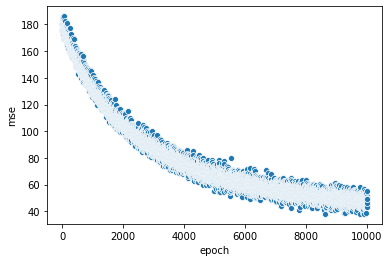

In [582]:
sns.scatterplot(hist.epoch, hist.mse)

In [585]:
test_predictions = model.predict(ntest_data)

In [586]:
test = pd.DataFrame() 
test.insert(0,'actual', test_label)
test.insert(1,'predict',test_predictions)

In [703]:
#sns.scatterplot(test.predict, test.actual)

## save model

In [707]:
#model.save('luEval3.h5')

## load model

In [5]:
model =  keras.models.load_model('luEval3.h5')

## format data

In [6]:
data = pd.read_csv('gpp24JAN20.csv')
clean1(data)
#clean2(data)
datal =data.drop('Line#', axis=1)
#datal = datal.drop('final', axis =1)

In [7]:
#data_label = datal['final']
#data_data = datal.drop('final', axis =1)

In [8]:
data_stats = datal.describe()
data_stats = data_stats.transpose()
ndata_data = norm(datal, data_stats)

In [9]:
data

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,odds
0,1,11,1.1,105,10.5,895,89.5,-23000,388.8016,279.156524,41.352220,1.988734
1,2,18,1.8,86,8.6,914,91.4,-22480,376.4118,277.288520,38.939441,1.223912
2,3,7,0.7,85,8.5,915,91.5,-27000,381.5111,279.168183,39.381225,0.143277
3,4,8,0.8,100,10.0,900,90.0,-24800,387.8644,283.849927,37.796868,0.637638
4,5,5,0.5,72,7.2,928,92.8,-29360,369.3801,277.582128,36.762690,4.739926
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,16,1.6,119,11.9,881,88.1,-19320,396.3085,285.740895,42.060819,2.220374
996,997,10,1.0,93,9.3,907,90.7,-24840,384.2032,278.818789,38.497272,3.462360
997,998,10,1.0,111,11.1,889,88.9,-22680,389.4773,283.728941,40.531139,0.506559
998,999,8,0.8,109,10.9,891,89.1,-23720,386.5442,286.660266,41.356450,2.366490


## make predictions

In [10]:
predictions = model.predict(ndata_data)

In [11]:
# if there is a column with final use this
#data.insert(13, 'predict', predictions)

data.insert(11, 'predict', predictions)

In [12]:
#data.insert(12, 'stat', pdfV(datal.predict, datal.predict.mean(), datal.predict.std()))

## filter results

In [13]:
#changed lower value from 135 to 200

lo= data[(data.predict >= 200)]
lo= lo[lo.predict <= 327]
lo = lo[lo.odds>= 0.0038]
#lo = lo[lo.AvgPt>= 369]
lo = lo[lo.AvgPt<= 410]
#lo = lo[lo.stat>= 200]

In [14]:
data[439:440]

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,predict,odds
439,440,8,0.8,95,9.5,905,90.5,-25400,384.2032,281.380502,37.9808,277.100342,2.05997


In [15]:
optimal = lo.sort_values(by='predict', ascending = False)[:68]

In [16]:
optimal.sort_values(by='Line#', ascending = True)

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,predict,odds
0,1,11,1.1,105,10.5,895,89.5,-23000,388.8016,279.156524,41.352220,313.483398,1.988734
18,19,14,1.4,137,13.7,863,86.3,-17960,392.7457,290.180059,41.822694,319.598236,3.884256
20,21,13,1.3,130,13.0,870,87.0,-19200,400.5275,291.121311,41.888666,316.918976,0.202499
28,29,9,0.9,107,10.7,893,89.3,-23560,391.7288,282.969611,39.538313,321.341553,1.755438
36,37,15,1.5,125,12.5,875,87.5,-19000,394.2759,286.091415,39.755731,313.731201,1.917152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,964,11,1.1,100,10.0,900,90.0,-23600,393.5327,283.126556,40.046987,311.689758,4.408751
968,969,12,1.2,122,12.2,878,87.8,-20560,396.2432,283.441724,40.517986,320.484100,1.553300
977,978,5,0.5,91,9.1,909,90.9,-27080,377.5888,277.415970,38.934786,320.237549,4.405089
981,982,8,0.8,90,9.0,910,91.0,-26000,384.1226,280.985548,38.668896,322.272583,0.188517


# save results

In [17]:
optimal.to_csv('f_line.csv')

In [18]:
len(optimal)

68